In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import re
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/drive/Shareddrives/도터디/캡스톤 디자인/csv/wadiz_2.csv')

In [ ]:
dataset1 = pd.read_csv('/content/drive/Shareddrives/도터디/캡스톤 디자인/csv/wadiz_1.csv')

In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2356 non-null   int64 
 1   제목          2346 non-null   object
 2   카테고리        2356 non-null   object
 3   메이커 명       2356 non-null   object
 4   요약          2355 non-null   object
 5   본문          2276 non-null   object
 6   ocr         2355 non-null   object
 7   이미지 수       2356 non-null   int64 
 8   움짤 수        2356 non-null   int64 
 9   동영상 수       2356 non-null   int64 
 10  가격          2356 non-null   int64 
 11  목표 가격       2356 non-null   int64 
 12  펀딩 기간       2356 non-null   object
 13  페이스북 지지자 수  2356 non-null   int64 
 14  새소식 수       2356 non-null   int64 
 15  서포터 수       2356 non-null   int64 
 16  하트 수        2356 non-null   int64 
 17  성공 여부       2356 non-null   int64 
 18  반응률         2356 non-null   int64 
dtypes: int64(12), object(7)
memory usage: 349.8+ KB


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2356 non-null   int64 
 1   제목          2346 non-null   object
 2   카테고리        2356 non-null   object
 3   메이커 명       2356 non-null   object
 4   요약          2355 non-null   object
 5   본문          2276 non-null   object
 6   ocr         2355 non-null   object
 7   이미지 수       2356 non-null   int64 
 8   움짤 수        2356 non-null   int64 
 9   동영상 수       2356 non-null   int64 
 10  가격          2356 non-null   int64 
 11  목표 가격       2356 non-null   int64 
 12  펀딩 기간       2356 non-null   object
 13  페이스북 지지자 수  2356 non-null   int64 
 14  새소식 수       2356 non-null   int64 
 15  서포터 수       2356 non-null   int64 
 16  하트 수        2356 non-null   int64 
 17  성공 여부       2356 non-null   int64 
 18  반응률         2356 non-null   int64 
 19  명사          2356 non-null   object
 20  검색어     

In [ ]:
del dataset['Unnamed: 0']
del dataset['신규성']
del dataset['카테고리']
del dataset['메이커 명']
del dataset['서포터 수']
del dataset['ocr']
dataset['서포터 수'] = dataset1['서포터 수']
dataset.head()

,제목,요약,본문,이미지 수,움짤 수,동영상 수,가격,목표 가격,펀딩 기간,페이스북 지지자 수,새소식 수,하트 수,성공 여부,반응률,명사,검색어,서포터 수
0,[나노다운 슬림함] 프로급 듀얼 충전! 슈피겐의 세번째 나노프로!,이런 충전기 보셨어요? 콘센트 크기에 최적화된 슈피겐의 세번째 나노프로 충전기! 이...,펀딩금 사용계획\n슈피겐은 지속적인 제품 개발로 슈피겐을 찾는 모든 분들에게 최고의...,18,6,0,26900,1000000,9,46,60,99,1697,100,"['나노', '슬림', '프로급', '듀얼', '충전', '나노', '프로', '충...",충전기 케이블 충전 아이,454
1,착용 시 18배 운동효과! 젤패드로 자극을 균일하게! 임상검증 EMS,운동을 매번 포기하셨나요? 지금 이 순간부터 다시 결심하세요! 이볼브 EMS 가 쉽...,"""BMR"" 사는 아일랜드 갈웨이에 소재한 민간 기업으로서 EMS 관련 설계, 제조,...",60,33,0,119000,1000000,16,154,1000,59,4059,100,"['착용', '운동', '효과', '패드', '자극', '균일', '임상', '검증...",운동 패드,477
2,"[무선50시간] 180도 회전 캠핑 서큘레이터,LED조명+리모콘까지 올킬","180도 자동 회전 캠핑용 서큘레이터 등장! 캠핑 갬성을 해치는 더위와 습기, 이제...","해외 여행이 단절된 요즘, 자연의 품 속에서 나만의 보금자리를 만드는 캠핑이 인기인...",127,45,0,62500,1000000,12,149,50,220,10647,2,"['무선', '시간', '회전', '캠핑', '서큘레이터', '조명', '리모콘',...",서큘레이터 사이드 스탠드 배터리 캠핑 바람,1367
3,(앵콜)[페나]와 [브라운앤프렌즈]의 만남! 레트로를 한스푼 담은 키보드,귀엽게 차려입은 클래식 브라운이 여러분에게 새로운 키보드를 선보입니다! 인기 레트로...,※펀딩 만족도 확인일자 :2022.03.31\n\n\n매력적인 레트로 디자인에 눈으...,79,8,0,189000,5000000,19,18,10,36,219,1,"['브라운', '렌즈', '만남', '레트', '스푼', '키보드', '클래식', ...",키보드 브라운 스위치 기계식 빈티지 타자기 디자인 레트 지역,72
4,와디즈에서 가장 먼저 만나는 나만의 스냅사진가 - 캐논파워샷 픽,"함께 있는 모두를 자연스럽게, 자동으로 찍어주는, 똑똑한 AI 나만의 AI포토그래퍼...",카메라의 대명사 캐논에서 새로이 출시되는 파워샷 PICK카메라 출시되었습니다.\n브...,18,3,2,509000,1000000,6,21,40,90,6825,20,"['스냅', '사진가', '캐논', '파워', '모두', '자연', '자동', '포...",카메라 스마트 캐논 파워,152


In [ ]:
noun = []
for i in dataset['명사']:
  nounn = []
  for j in i:
    j = j.replace('[','')
    j = j.replace(']','')
    j = j.replace("'",'')
    j = j.replace(',','')
    nounn.append(j)
  nounn = ''.join(nounn)
  #nounn = nounn.split()  
  noun.append(nounn)

In [ ]:

special = []
for i in noun:
  if '특허' in i:
    special.append(1)
  else:
    special.append(0)

dataset['신규성'] = special

In [ ]:
del dataset['명사']
dataset['명사'] = noun

In [ ]:
dd = []
ddlen = []
for i in dataset['본문']:
  i = str(i).replace('\n', ' ')
  dd.append(i)
  ddlen.append(len(i))
del dataset['본문']
dataset['본문'] = dd
dataset['본문 길이'] = ddlen

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.head()

,제목,요약,이미지 수,움짤 수,동영상 수,가격,목표 가격,펀딩 기간,페이스북 지지자 수,새소식 수,하트 수,성공 여부,반응률,검색어,서포터 수,신규성,명사,본문,본문 길이
0,[나노다운 슬림함] 프로급 듀얼 충전! 슈피겐의 세번째 나노프로!,이런 충전기 보셨어요? 콘센트 크기에 최적화된 슈피겐의 세번째 나노프로 충전기! 이...,18,6,0,26900,1000000,9,46,60,99,1697,100,충전기 케이블 충전 아이,454,0,나노 슬림 프로급 듀얼 충전 나노 프로 충전기 콘센트 크기 최적화 프로 충전기 이번...,펀딩금 사용계획 슈피겐은 지속적인 제품 개발로 슈피겐을 찾는 모든 분들에게 최고의 ...,740
1,착용 시 18배 운동효과! 젤패드로 자극을 균일하게! 임상검증 EMS,운동을 매번 포기하셨나요? 지금 이 순간부터 다시 결심하세요! 이볼브 EMS 가 쉽...,60,33,0,119000,1000000,16,154,1000,59,4059,100,운동 패드,477,0,착용 운동 효과 패드 자극 균일 임상 검증 운동 포기 순간 결심 효과적 복근 운동 ...,"""BMR"" 사는 아일랜드 갈웨이에 소재한 민간 기업으로서 EMS 관련 설계, 제조,...",4732
2,"[무선50시간] 180도 회전 캠핑 서큘레이터,LED조명+리모콘까지 올킬","180도 자동 회전 캠핑용 서큘레이터 등장! 캠핑 갬성을 해치는 더위와 습기, 이제...",127,45,0,62500,1000000,12,149,50,220,10647,2,서큘레이터 사이드 스탠드 배터리 캠핑 바람,1367,0,무선 시간 회전 캠핑 서큘레이터 조명 리모콘 자동 회전 캠핑 서큘레이터 등장 캠핑 ...,"해외 여행이 단절된 요즘, 자연의 품 속에서 나만의 보금자리를 만드는 캠핑이 인기인...",5906
3,(앵콜)[페나]와 [브라운앤프렌즈]의 만남! 레트로를 한스푼 담은 키보드,귀엽게 차려입은 클래식 브라운이 여러분에게 새로운 키보드를 선보입니다! 인기 레트로...,79,8,0,189000,5000000,19,18,10,36,219,1,키보드 브라운 스위치 기계식 빈티지 타자기 디자인 레트 지역,72,0,브라운 렌즈 만남 레트 스푼 키보드 클래식 브라운 키보드 인기 레트 키보드 메이커 ...,※펀딩 만족도 확인일자 :2022.03.31 매력적인 레트로 디자인에 눈으로 한...,6280
4,와디즈에서 가장 먼저 만나는 나만의 스냅사진가 - 캐논파워샷 픽,"함께 있는 모두를 자연스럽게, 자동으로 찍어주는, 똑똑한 AI 나만의 AI포토그래퍼...",18,3,2,509000,1000000,6,21,40,90,6825,20,카메라 스마트 캐논 파워,152,0,스냅 사진가 캐논 파워 모두 자연 자동 포토 캐논 파워 일상 카메라 캐논 파워 카메...,카메라의 대명사 캐논에서 새로이 출시되는 파워샷 PICK카메라 출시되었습니다. 브이...,810


성공확률 조정

In [ ]:
success =[]
for i in dataset['성공 여부']:
  if i >= 100:
    success.append(1)
  else:
    success.append(0)


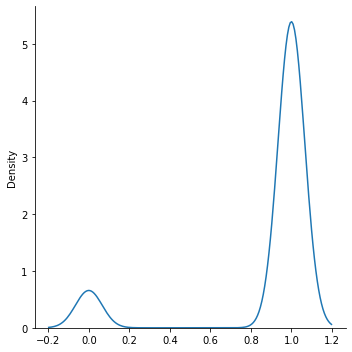

In [ ]:
sns.displot(success,kind = 'kde')
plt.show()


상위 몇프로를 성공으로 둘지

In [ ]:
percent = dataset['성공 여부'].quantile(q=0.9, interpolation='nearest')
percent

6988

In [ ]:
successful = []
for i in success:
  if i >= percent:
    successful.append(1)
  else:
    successful.append(0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


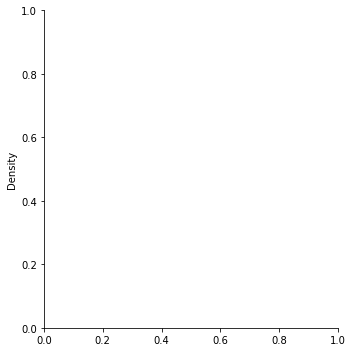

In [ ]:
sns.displot(successful,kind = 'kde')
plt.show()

In [ ]:
del dataset['성공 여부']
dataset['성공 여부'] = successful

In [ ]:
period = []
for i in dataset['펀딩 기간']:
  i = str(i)
  if i == '1 day, 0:00:00':
    i = 1
    period.append(i)
  elif i == '0:00:00':
    i = 1
    period.append(i)
  elif int(i) < 0:
    i = -int(i)
    period.append(int(i))
  else:
    i = int(i)
    period.append(i)

In [ ]:
for i in period:
  print(i)

9
16
12
19
6
20
24
14
20
30
9
6
9
31
46
13
15
26
14
20
34
37
18
21
27
17
17
38
18
18
45
21
29
26
22
22
30
27
36
42
35
42
53
46
7
13
7
19
20
14
12
19
21
16
13
6
13
12
14
18
19
13
15
24
14
28
6
28
21
23
28
16
21
14
20
12
21
21
14
9
15
13
24
15
25
22
22
26
29
21
18
31
31
28
46
15
28
11
21
11
30
13
17
38
17
18
21
25
19
26
26
13
6
31
8
22
20
37
11
25
21
18
21
23
33
43
14
28
14
17
23
38
24
25
19
13
23
21
8
14
26
6
19
8
28
37
21
28
10
21
16
20
26
12
22
32
11
20
21
15
14
24
18
18
11
27
37
28
20
14
6
45
27
5
12
15
32
23
26
27
13
24
6
7
21
29
10
31
28
35
36
12
7
34
27
34
16
39
21
39
15
15
26
17
13
25
32
21
11
21
19
16
13
20
23
8
21
35
18
22
7
23
45
18
18
7
20
21
41
31
14
9
21
11
21
25
25
46
16
19
26
29
28
20
31
20
15
16
13
14
14
14
28
14
18
14
22
30
19
12
20
17
9
15
10
18
12
26
15
19
14
9
20
6
30
20
29
20
15
13
24
15
14
19
10
11
26
36
16
22
20
16
23
25
21
14
21
11
23
25
17
10
21
25
18
13
28
7
13
7
9
15
17
14
15
11
15
18
40
16
37
13
22
10
23
24
21
28
21
18
25
14
21
14
27
28
14
8
16
32
17
17
21
32

In [ ]:
del dataset['펀딩 기간']
dataset['펀딩 기간'] = period

In [ ]:
dataset.head()

,제목,요약,이미지 수,움짤 수,동영상 수,가격,목표 가격,페이스북 지지자 수,새소식 수,하트 수,반응률,검색어,서포터 수,신규성,명사,본문,본문 길이,성공 여부,펀딩 기간
0,[나노다운 슬림함] 프로급 듀얼 충전! 슈피겐의 세번째 나노프로!,이런 충전기 보셨어요? 콘센트 크기에 최적화된 슈피겐의 세번째 나노프로 충전기! 이...,18,6,0,26900,1000000,46,60,99,100,충전기 케이블 충전 아이,454,0,나노 슬림 프로급 듀얼 충전 나노 프로 충전기 콘센트 크기 최적화 프로 충전기 이번...,펀딩금 사용계획 슈피겐은 지속적인 제품 개발로 슈피겐을 찾는 모든 분들에게 최고의 ...,740,0,9
1,착용 시 18배 운동효과! 젤패드로 자극을 균일하게! 임상검증 EMS,운동을 매번 포기하셨나요? 지금 이 순간부터 다시 결심하세요! 이볼브 EMS 가 쉽...,60,33,0,119000,1000000,154,1000,59,100,운동 패드,477,0,착용 운동 효과 패드 자극 균일 임상 검증 운동 포기 순간 결심 효과적 복근 운동 ...,"""BMR"" 사는 아일랜드 갈웨이에 소재한 민간 기업으로서 EMS 관련 설계, 제조,...",4732,0,16
2,"[무선50시간] 180도 회전 캠핑 서큘레이터,LED조명+리모콘까지 올킬","180도 자동 회전 캠핑용 서큘레이터 등장! 캠핑 갬성을 해치는 더위와 습기, 이제...",127,45,0,62500,1000000,149,50,220,2,서큘레이터 사이드 스탠드 배터리 캠핑 바람,1367,0,무선 시간 회전 캠핑 서큘레이터 조명 리모콘 자동 회전 캠핑 서큘레이터 등장 캠핑 ...,"해외 여행이 단절된 요즘, 자연의 품 속에서 나만의 보금자리를 만드는 캠핑이 인기인...",5906,0,12
3,(앵콜)[페나]와 [브라운앤프렌즈]의 만남! 레트로를 한스푼 담은 키보드,귀엽게 차려입은 클래식 브라운이 여러분에게 새로운 키보드를 선보입니다! 인기 레트로...,79,8,0,189000,5000000,18,10,36,1,키보드 브라운 스위치 기계식 빈티지 타자기 디자인 레트 지역,72,0,브라운 렌즈 만남 레트 스푼 키보드 클래식 브라운 키보드 인기 레트 키보드 메이커 ...,※펀딩 만족도 확인일자 :2022.03.31 매력적인 레트로 디자인에 눈으로 한...,6280,0,19
4,와디즈에서 가장 먼저 만나는 나만의 스냅사진가 - 캐논파워샷 픽,"함께 있는 모두를 자연스럽게, 자동으로 찍어주는, 똑똑한 AI 나만의 AI포토그래퍼...",18,3,2,509000,1000000,21,40,90,20,카메라 스마트 캐논 파워,152,0,스냅 사진가 캐논 파워 모두 자연 자동 포토 캐논 파워 일상 카메라 캐논 파워 카메...,카메라의 대명사 캐논에서 새로이 출시되는 파워샷 PICK카메라 출시되었습니다. 브이...,810,0,6


In [ ]:
dataset.to_csv('/content/drive/My Drive/캡스톤 디자인/csv/wadiz_3.csv')